In [160]:
from utils.preprocess import Calibrator, Calibrator_backup
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from utils.kde import smooth

%matplotlib inline

In [2]:
wl = [i for i in range(660, 921, 10)]

In [3]:
calib = Calibrator()
p_index = list("chik")
s_df = pd.read_csv("CHIKEN/sim_20190522_no_prism.csv")
m_df = pd.read_csv("data/processed/20190510/IJV/phantom/20190510.csv")
s_df = s_df[(s_df["wl"] >= 660) & (s_df["wl"]<=920)]

In [4]:
s_df.head(3)

,wl,c,h,i,k
0,660,4.803836e-14,2.575463e-11,1.387770e-09,8.321318e-09
1,670,5.946785e-14,4.107851e-11,1.473433e-09,1.014764e-08
2,680,5.489180e-14,4.942902e-11,1.755818e-09,1.027873e-08


In [5]:
m_df.head(1)

,wavelength,c,e,h,i,k,n
0,660,14.135375,2627.638745,62.549053,711.787844,5688.642882,2323.380046


In [151]:
mea_df = m_df[p_index].values.T
sim_df = s_df[p_index].values.T

print(mea_df.shape)
print(sim_df.shape)
a, b, rr = calib.fit(mea_df, sim_df, cross_valid=False, least_square=True)
#                      plot_path="data/calibrated/20190510/IJV")

(4, 27)
(4, 27)


#### 觀察拍攝仿體校正後是否跟模擬一樣

In [158]:
mm_df = m_df[["c", "h", "i", "k"]].values.T
calibed = calib.calibrate(mm_df)

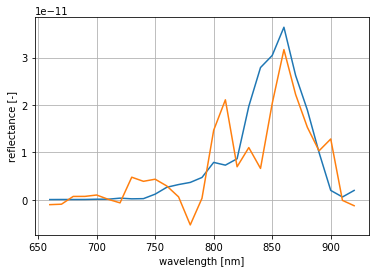

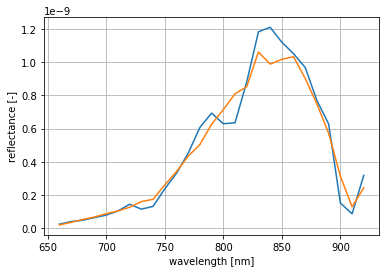

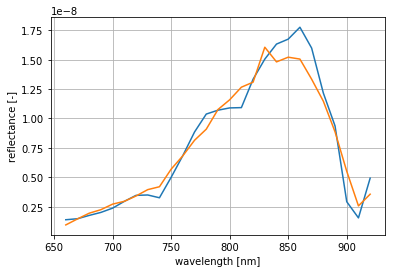

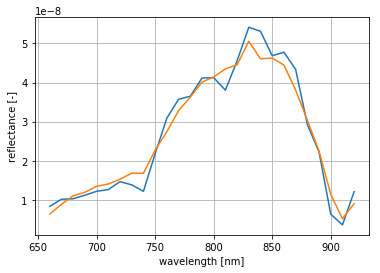

In [159]:
# for i in "chik":
for i, p in enumerate("chik"):
    plt.plot(wl, s_df[p])
    plt.plot(wl, calibed[i])
    plt.xlabel("wavelength [nm]")
    plt.ylabel("reflectance [-]")
    plt.grid()
    plt.show()

### 作弊 改校正係數

#### 直接平均

In [24]:
# 740
calib.a[8, :] = (calib.a[7, :] + calib.a[9, :])/2
# calib.b[8, :] = (calib.b[7, :] + calib.b[9, :])/2

# 810
# calib.a[15, :] = (calib.a[14, :] + calib.a[16, :])/2

#### 多項式fit

In [62]:
res0 = np.polyfit(wl, calib.a[:, 0], 5)
res1 = np.polyfit(wl, calib.a[:, 1], 5)
res2 = np.polyfit(wl, calib.a[:, 2], 5)
resb0 = np.polyfit(wl, calib.b[:, 0], 5)
resb1 = np.polyfit(wl, calib.b[:, 1], 5)
resb2 = np.polyfit(wl, calib.b[:, 2], 5)

calib.a[:, 0] = fit(wl, res0)
calib.a[:, 1] = fit(wl, res1)
calib.a[:, 2] = fit(wl, res2)
calib.b[:, 0] = fit(wl, resb0)
calib.b[:, 1] = fit(wl, resb1)
calib.b[:, 2] = fit(wl, resb2)

In [63]:
res
def fit(x, res):
    x = np.asarray(x)
    ans = 0
    for i in range(len(res)):
        ans += res[i] * x ** (len(res)-i-1)
    return ans

#### 校正參數a

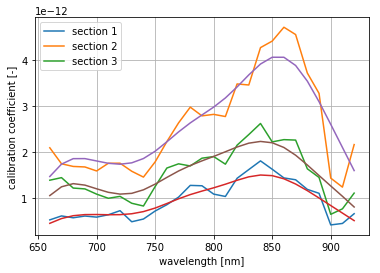

In [152]:
bw = 2.2
plt.plot(wl, calib.a[:, 0], label="section 1")
plt.plot(wl, calib.a[:, 1], label="section 2")
plt.plot(wl, calib.a[:, 2], label="section 3")
# plt.plot(wl, fit(wl, res0))
# plt.plot(wl, fit(wl, res1))
# plt.plot(wl, fit(wl, res2))
plt.plot(wl, smooth(calib.a[:, 0], bw))
plt.plot(wl, smooth(calib.a[:, 1], bw))
plt.plot(wl, smooth(calib.a[:, 2], bw))


plt.xlabel("wavelength [nm]")
plt.ylabel("calibration coefficient [-]")

plt.grid()
plt.legend()
plt.show()

#### 校正參數b

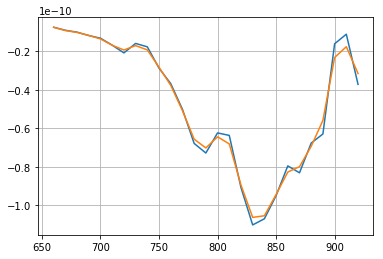

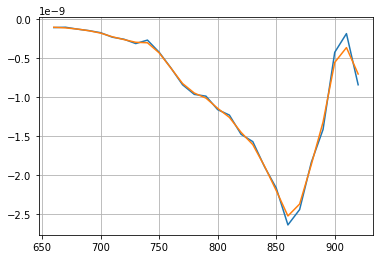

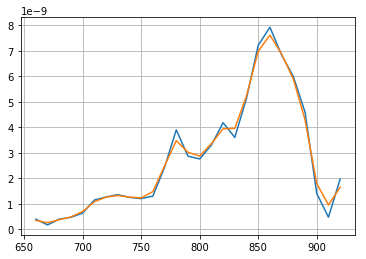

In [153]:
bw = 0.6
plt.plot(wl, calib.b[:, 0], label="section 1")
# plt.plot(wl, fit(wl, resb0))
plt.plot(wl, smooth(calib.b[:, 0], bw))

plt.grid()
plt.show()

plt.plot(wl, calib.b[:, 1], label="section 2")
# plt.plot(wl, fit(wl, resb1))
plt.plot(wl, smooth(calib.b[:, 1], bw))
plt.grid()
plt.show()

plt.plot(wl, calib.b[:, 2], label="section 3")
# plt.plot(wl, fit(wl, resb2))
plt.plot(wl, smooth(calib.b[:, 2], bw))
plt.grid()
plt.show()

In [146]:
a, b, rr = calib.fit(mea_df, sim_df, cross_valid=False, least_square=True)

In [164]:
calib_bk = Calibrator_backup()
a, b, rr = calib_bk.fit(mea_df, sim_df, cross_valid=True, least_square=False)

Optimization terminated successfully.
         Current function value: 0.198145
         Iterations: 78
         Function evaluations: 152
Optimization terminated successfully.
         Current function value: 0.140520
         Iterations: 76
         Function evaluations: 151
Optimization terminated successfully.
         Current function value: 0.134680
         Iterations: 77
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 0.117058
         Iterations: 77
         Function evaluations: 152
Optimization terminated successfully.
         Current function value: 0.109739
         Iterations: 77
         Function evaluations: 150
Optimization terminated successfully.
         Current function value: 0.098759
         Iterations: 75
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 0.075554
         Iterations: 74
         Function evaluations: 148
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.010239
         Iterations: 69
         Function evaluations: 135
Optimization terminated successfully.
         Current function value: 0.008925
         Iterations: 72
         Function evaluations: 139
Optimization terminated successfully.
         Current function value: 0.012740
         Iterations: 72
         Function evaluations: 138
Optimization terminated successfully.
         Current function value: 0.013729
         Iterations: 67
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 0.007673
         Iterations: 70
         Function evaluations: 136
Optimization terminated successfully.
         Current function value: 0.013383
         Iterations: 66
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: 0.025983
         Iterations: 65
         Function evaluations: 128
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.134637
         Iterations: 72
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 0.102988
         Iterations: 76
         Function evaluations: 149
Optimization terminated successfully.
         Current function value: 0.124522
         Iterations: 71
         Function evaluations: 141
leave: 3, r_square: 0.57
finally leave: 1


In [168]:
bw1 = 2.2
bw2 = 0.6
for i in range(3):
    calib.a[:, i] = smooth(calib.a[:, i], bw1)
    calib.b[:, i] = smooth(calib.b[:, i], bw2)
    calib_bk.a = smooth(calib_bk.a, bw1)
    calib_bk.b = smooth(calib_bk.b, bw2)
    

#### 活體

In [132]:
live = pd.read_csv("data/processed/20190510/IJV/live/20190510_1_1.csv")

In [148]:
live_max = calib.calibrate(live["max"].values)[0]
live_min = calib.calibrate(live["min"].values)[0]

In [169]:
live_max = calib_bk.calibrate(live["max"].values)[0]
live_min = calib_bk.calibrate(live["min"].values)[0]

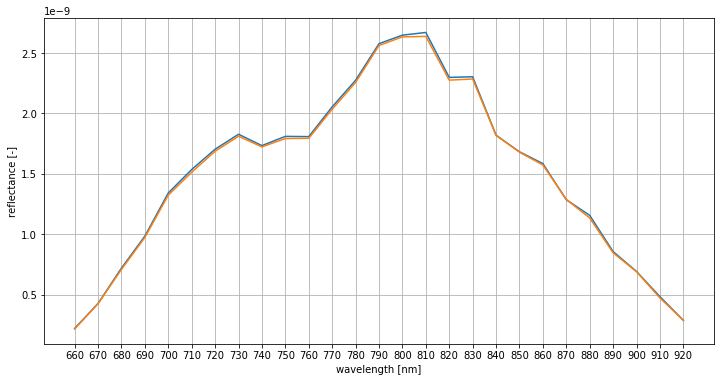

In [170]:
plt.figure(figsize=(12, 6))
plt.plot(wl, live_max, label="max")
plt.plot(wl, live_min, label="min")
plt.xlabel("wavelength [nm]")
plt.ylabel("reflectance [-]")
plt.xticks(wl)
plt.grid()
plt.show()

In [15]:
assert False

AssertionError: 

In [ ]:
m_df["c"], calib.calibrate(m_df["c"])

In [ ]:
x = np.arange(1, 100)
y = x * 6 + 62

In [ ]:
# plt.plot(x, y)
plt.plot(np.log(x), np.log(y))

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def rmsp(x, a, b, c):
    return (x ** a)  * b + c


In [ ]:
x = np.arange(1, 100)
y = (x**1.1) * 2 + 4 + np.random.rand() * 1

result = curve_fit(rmsp, x, y)

In [ ]:
result

In [ ]:
x = np.asarray([1,2,3,4,5,6])
y = x ** 2 + x * 4 + 3
np.polyfit(x, y, 2)

In [ ]:
m_df.head(1)

In [ ]:
live = pd.read_csv("data/processed/20190510/IJV/live/20190510_1_1.csv")
live.head(1)

In [ ]:
plt.plot(wl, m_df["c"], label="c")
plt.plot(wl, m_df["h"], label="h")
plt.plot(wl, m_df["i"], label="i")
plt.plot(wl, m_df["k"], label="k")

plt.plot(wl, live["max"], label="live")
plt.plot(wl, live["min"], label="live")

plt.legend()
plt.show()

In [ ]:
def linear_fit(x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    n = x.shape[0]
    
    x_mean = x.mean()
    y_mean = y.mean()
    
    Sxy = ((y-y_mean) * x).sum()
    Sxx = ((x-x_mean) * x).sum()
    b1 = Sxy/Sxx
    b0 = y_mean - b1 * x_mean
    
    return b0, b1
    

In [ ]:
x = np.arange(1, 10)
y = x * 5 + 186
linear_fit(x, y)

In [ ]:
from scipy.optimize import fmin

In [ ]:
xx = np.array([1,2,3,4,5])
yy = 34 * xx + 21
rmsp = lambda x: (((x[0] * xx + x[1] - yy)/yy)**2).mean()

In [ ]:
r = fmin(rmsp, x0=[1, 2])

In [ ]:
r